# Iris Keras

## Loading The Data 

First we load the dataset into a ``pandas.DataFrame``.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
sns.set_style('whitegrid')

from ibex.sklearn import ensemble as pd_ensemble

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
features = iris['feature_names']
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']], 
    columns=features+['class'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0



## Keras

In [3]:
import tensorflow

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

ModuleNotFoundError: No module named 'keras'

In [18]:
def buid_nn():
    np.random.seed(7)
    model = tensorflow.contrib.keras.models.Sequential()
    model.add(tensorflow.contrib.keras.layers.Dense(8, input_dim=4, activation='relu'))
    model.add(tensorflow.contrib.keras.layers.Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

buid_nn()

In [19]:
y = pd.get_dummies(iris['class']).values
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [20]:
X = iris[features].values
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [21]:
from sklearn.model_selection import KFold, cross_val_score

In [25]:
PYTHONHASHSEED=0
numpy.random.seed(7)

estimator.fit(X, y)
estimator.score(X, y)

0.98000000119209285

In [23]:
estimator = tensorflow.contrib.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn=buid_nn, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(estimator, X, y, cv=kfold)
scores

KeyboardInterrupt: 

In [10]:
np.mean(scores)

0.96666666865348816

Now that all the data is in a ``DataFrame``, we can use the ``feature_importances_`` attribute of a gradient boosting classifier. Note that in Ibex, this is a ``pandas.Series``.

In [3]:
pd_ensemble.GradientBoostingClassifier().fit(iris[features], iris['class']).feature_importances_

sepal length (cm)    0.078549
sepal width (cm)     0.104726
petal length (cm)    0.295431
petal width (cm)     0.447961
dtype: float64

Since the result is a ``Series``, we can use its ``plot`` method directly, and it will handle all labels for us.

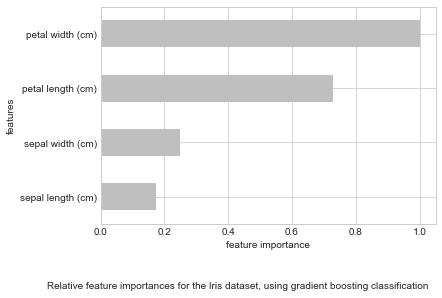

In [4]:
importances = pd_ensemble.GradientBoostingClassifier().fit(iris[features], iris['class']).feature_importances_
(importances / importances.max()).plot(kind='barh', color='0.75');
xlabel('feature importance');
ylabel('features');
figtext(
    0, 
    -0.1, 
    'Relative feature importances for the Iris dataset, using gradient boosting classification');